In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import os

plt.style.use("seaborn-v0_8")


In [3]:
DATA_PATH = "../data/raw/BrentOilPrices.csv"

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"Dataset not found at {DATA_PATH}")

df = pd.read_csv(DATA_PATH)

required_columns = {"Date", "Price"}
if not required_columns.issubset(df.columns):
    raise ValueError("CSV must contain 'Date' and 'Price' columns")

df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.dropna(subset=["Date", "Price"])
df = df.sort_values("Date").reset_index(drop=True)

df.head()


C:\Users\Y\AppData\Local\Temp\ipykernel_9140\261975511.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


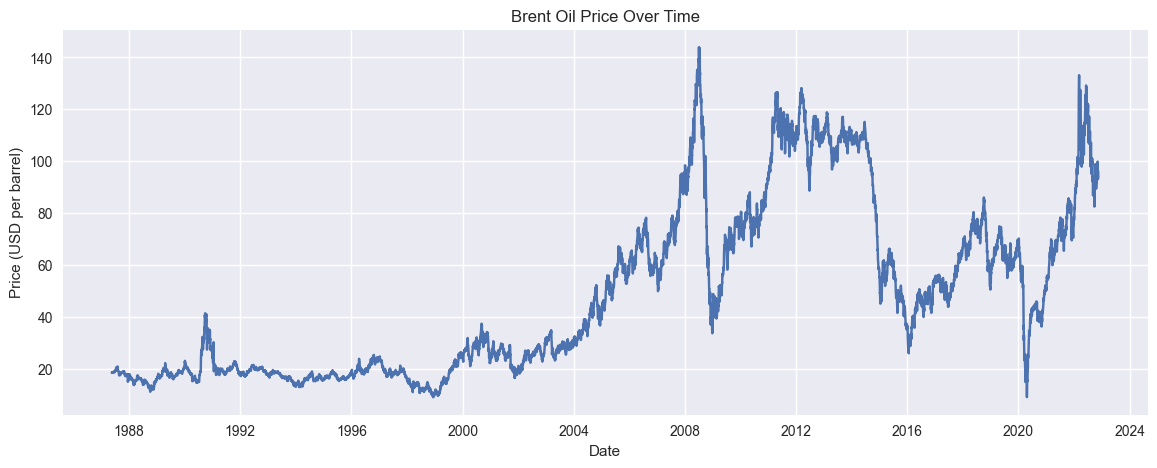

In [4]:
plt.figure(figsize=(14, 5))
plt.plot(df["Date"], df["Price"])
plt.title("Brent Oil Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD per barrel)")
plt.show()


Long-term trend exists

Large structural shocks

Non-stationary behavior

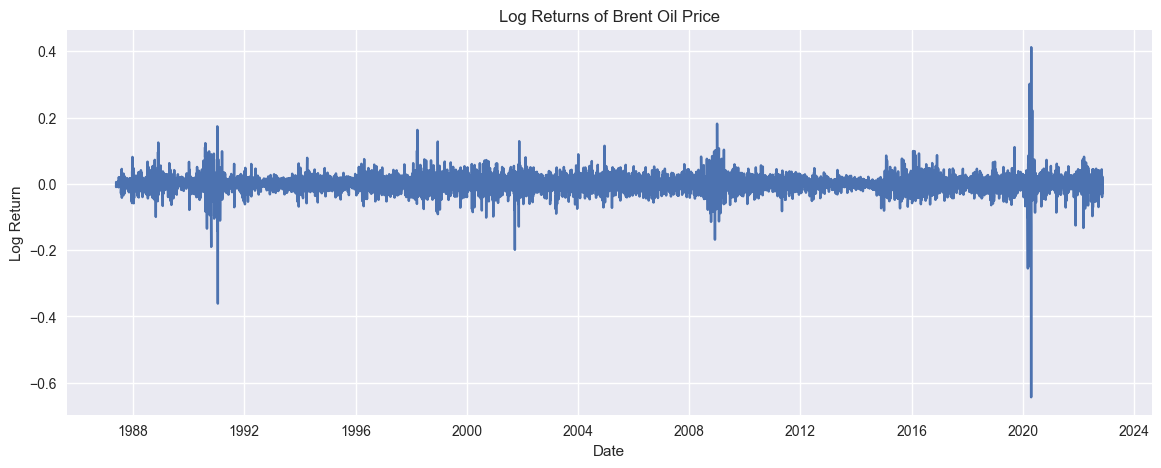

In [5]:
df["log_price"] = np.log(df["Price"])
df["log_return"] = df["log_price"].diff()
df = df.dropna()

plt.figure(figsize=(14, 5))
plt.plot(df["Date"], df["log_return"])
plt.title("Log Returns of Brent Oil Price")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.show()


This is critical justification for Bayesian modeling later.

In [6]:
result = adfuller(df["log_return"])

print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] < 0.05:
    print("Log returns are stationary")
else:
    print("Log returns are NOT stationary")


ADF Statistic: -16.427113494485894
p-value: 2.4985801611428892e-29
Log returns are stationary


🧠 You now have statistical evidence, not vibes.
ADF Statistic: -16.427113494485894
p-value: 2.4985801611428892e-29
Log returns are stationary

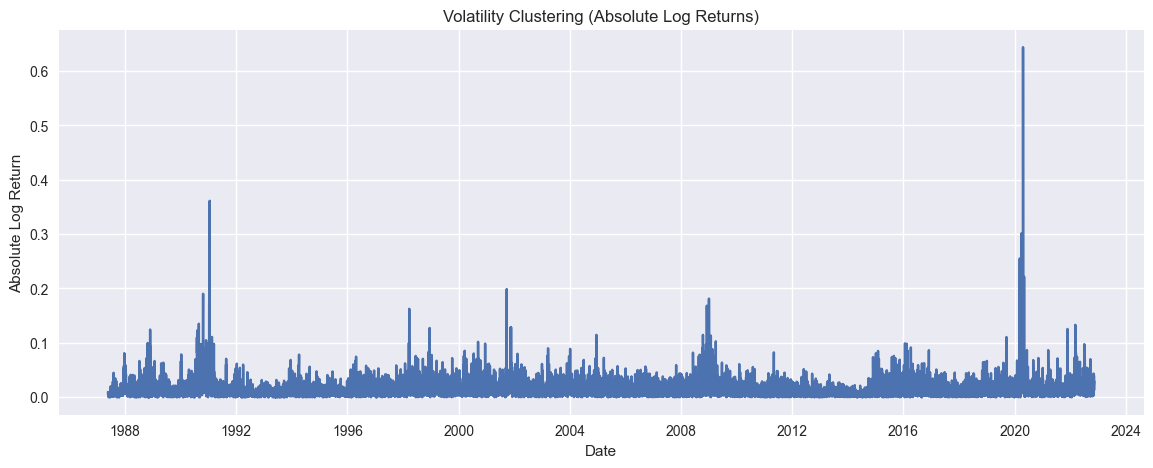

In [7]:
plt.figure(figsize=(14, 5))
plt.plot(df["Date"], np.abs(df["log_return"]))
plt.title("Volatility Clustering (Absolute Log Returns)")
plt.xlabel("Date")
plt.ylabel("Absolute Log Return")
plt.show()


🧠 Shows why regime/change-point models make sense.